In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Paths to the model and vectorizer
MODEL_PATH = 'multinomial_nb_model.joblib'
VECTORIZER_PATH = 'countvectorizer_model.joblib'

In [3]:
def predict_new_data(data_file):
    """
    Load the pre-trained model and vectorizer, perform predictions on the new data,
    and return the updated dataframe with predictions.

    :param data_file: Path to the CSV file containing new data for prediction
    :return: DataFrame with added prediction labels
    """
    # Load model and CountVectorizer
    classifier = joblib.load(MODEL_PATH)
    countvector = joblib.load(VECTORIZER_PATH)

    # Read the new data
    data_frame = pd.read_csv(data_file)
    
    # Check if 'full_text' column exists
    if 'full_text' not in data_frame.columns:
        raise ValueError("Kolom 'full_text' tidak ditemukan dalam file data.")

    # Vectorize the new data
    X_new = countvector.transform(data_frame['full_text'])
    
    # Predict the labels for the new data
    predictions = classifier.predict(X_new)
    
    # Add the predictions to the dataframe
    data_frame['label'] = predictions
    
    return data_frame

In [4]:
def save_predictions(data_frame, output_file):
    """
    Save the DataFrame with predictions to a new CSV file.

    :param data_frame: DataFrame with prediction results
    :param output_file: Path where the result CSV should be saved
    """
    data_frame.to_csv(output_file, index=False)
    print(f"Hasil prediksi berhasil disimpan ke '{output_file}'.")

In [5]:
def calculate_and_plot_percentage(data_file):
    """
    Calculate and plot the percentage distribution of 'terang' and 'hujan' labels.

    :param data_file: Path to the CSV file containing data with labels
    """
    # Read the predicted data
    data = pd.read_csv(data_file)

    # Filter for 'terang' and 'hujan' labels
    filtered_labels = data[data['label'].isin(['terang', 'hujan'])]

    # Calculate percentages of each label
    label_counts = filtered_labels['label'].value_counts()
    total_count = label_counts.sum()
    percentages = (label_counts / total_count) * 100

    # Print out the percentages
    for label, percent in percentages.items():
        print(f"{label.capitalize()}: {percent:.2f}%")

    # Plot a pie chart with the percentages
    colors = ['orange', 'blue']  # Colors for 'terang' and 'hujan' labels
    plt.figure(figsize=(8, 6))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Persentase Label Data Twitter (Terang dan Hujan)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

Hasil prediksi berhasil disimpan ke 'tweets-data/predicted_new_data_JogjaCuacaTuday.csv'.
Hujan: 80.00%
Terang: 20.00%


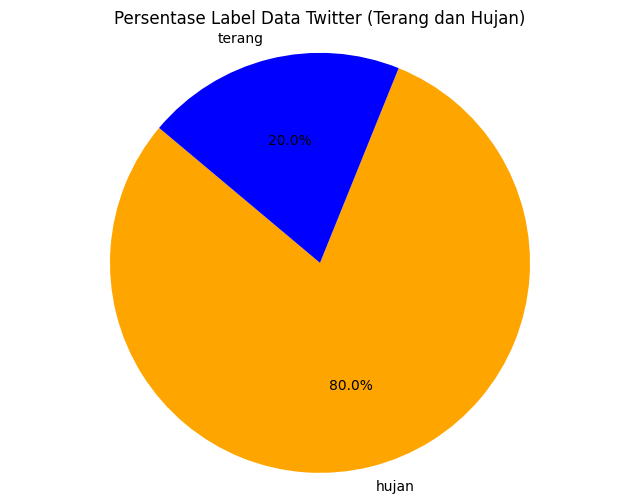

In [6]:
if __name__ == "__main__":
    # Define file paths
    new_data_file = 'tweets-data/sorted_JogjaCuacaTudey.csv'
    predicted_file = 'tweets-data/predicted_new_data_JogjaCuacaTuday.csv'

    try:
        # Predict labels for new data and save the result
        result = predict_new_data(new_data_file)
        save_predictions(result, predicted_file)

        # Calculate and plot the label percentages
        calculate_and_plot_percentage(predicted_file)
    
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")